In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
import os
path =os.listdir('training/')
classes = {'alouatta_palliata':0,'erythrocebus_patas':1,'cacajao_calvus':2,'macaca_fuscata':3,'cebuella_pygmea':4,'cebus_capucinus':5,'mico_argentatus':6,'saimiri_sciureus':7,'aotus_nigriceps':8,'trachypithecus_johnii':9}

In [3]:
import cv2
from skimage.feature import hog
from skimage import data, exposure
x=[]
y=[]
#tesla_image = cv2.imread("\training\alouatta_palliata/n019.jpg")
image = cv2.imread("training/alouatta_palliata/n0022.jpg",0)

for cls in classes:
    spec = 'training/'+cls
    for j in os.listdir(spec):
        img = cv2.imread(spec+'/'+j,-1)
        img = cv2.resize(img , (200,200))
        fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)
        x.append(img)
        y.append(classes[cls])

In [4]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
x=np.array(x)
y=np.array(y)

In [6]:
pd.Series(y).value_counts() #number of images in each category

3    122
7    114
5    113
1    111
2    110
6    106
8    106
9    106
0    105
4    105
dtype: int64

In [7]:
x.shape

(1098, 200, 200, 3)

In [8]:
y.shape

(1098,)

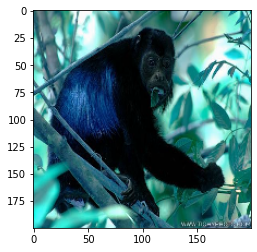

In [10]:
#show sample in gray mode using matplotlib
plt.imshow(x[0],cmap='gray')


In [11]:
x_updated = x.reshape(len(x),-1)
x_updated.shape

(1098, 120000)

In [12]:
#splitting the data 
x_train ,x_test,y_train ,y_test = train_test_split(x_updated ,y,random_state = 10,test_size=0.2)

In [13]:
x_train.shape , x_test.shape

((878, 120000), (220, 120000))

In [14]:
#flattening the array
print(x_train.max(),x_train.min())
print(x_test.max())
x_train = x_train/255
x_test=x_test/255
print(x_train.max(),x_train.min())
print(x_test.max(), x_test.min())

255 0
255
1.0 0.0
1.0 0.0


In [35]:
#Feature Selection based on PCA
from sklearn.decomposition import PCA

In [36]:
print(x_train.shape ,x_test.shape)

pca=PCA(.98)
pca_train = x_train
pca_test=x_test

(768, 120000) (330, 120000)


In [15]:
#implementing SVM
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [38]:
import warnings
warnings.filterwarnings('ignore')
lg = LogisticRegression(C=0.1)
lg.fit(pca_train,y_train)

LogisticRegression(C=0.1)

In [17]:
sv=SVC(C = 10, kernel = "rbf",probability = True)
sv.fit(x_train , y_train)

SVC(C=10, probability=True)

In [40]:
print("Training Score : ",lg.score(x_train,y_train))
print("Testing Score : ",lg.score(x_test,y_test))

Training Score :  1.0
Testing Score :  0.5060606060606061


In [18]:
print("Training Score : ",sv.score(x_train,y_train))
print("Testing Score : ",sv.score(x_test,y_test))

Training Score :  1.0
Testing Score :  0.6227272727272727


In [20]:
#prediction
pred= sv.predict(x_test)
np.where(y_test != pred)

(array([  0,   2,   7,   8,  13,  14,  18,  20,  27,  33,  35,  36,  39,
         40,  42,  43,  50,  52,  53,  54,  57,  61,  62,  64,  65,  68,
         69,  70,  71,  72,  91,  95,  96,  99, 100, 102, 106, 107, 108,
        110, 113, 115, 117, 119, 120, 121, 124, 127, 129, 132, 135, 138,
        143, 144, 158, 159, 166, 167, 168, 172, 174, 177, 178, 182, 183,
        185, 188, 189, 190, 191, 193, 195, 198, 199, 200, 203, 204, 208,
        209, 210, 214, 218, 219], dtype=int64),)

In [21]:
pred[1]

2

In [22]:
y_test[1]

2

In [23]:
from sklearn.metrics import accuracy_score
con_mat =confusion_matrix(y_test,pred)
print(con_mat)
print("Accuracy on unknown data is",accuracy_score(y_test,pred))


[[10  0  1  0  0  1  0  0  1  3]
 [ 0 16  0  1  0  0  1  0  0  2]
 [ 0  0 16  0  2  3  0  2  3  0]
 [ 0  4  1 18  1  0  2  0  0  0]
 [ 1  0  1  1  7  3  1  0  1  0]
 [ 1  0  0  1  0 18  1  0  1  1]
 [ 0  1  1  1  1  3 13  1  0  0]
 [ 0  3  1  1  3  2  2 14  2  0]
 [ 2  2  0  0  0  0  0  2 15  2]
 [ 3  1  1  0  1  3  0  3  0 10]]
Accuracy on unknown data is 0.6227272727272727


In [24]:
def plot_confusion_matrix(con_mat, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.viridis):
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        con_mat = cm.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(con_mat)
    
    thresh = con_mat.max() / 2
    for i,j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
        plt.text(j, i, con_mat[i,j],
        horizontalalignment ="center",
        color="black" if con_mat[i, j] > thresh else "white")
    
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Confusion matrix, without normalization
[[16  0  1  0  0  3  0  0  1  3]
 [ 2 19  0  2  1  1  5  0  2  3]
 [ 0  0 26  0  2  2  1  3  4  0]
 [ 0  3  1 24  2  0  4  0  0  0]
 [ 1  1  3  2 11  4  2  2  3  0]
 [ 1  0  0  2  0 26  2  0  2  3]
 [ 0  1  1  0  0  4 24  1  1  0]
 [ 0  3  3  1  3  3  2 21  2  0]
 [ 2  4  0  1  2  0  1  3 16  2]
 [ 5  1  1  0  1  5  0  2  1 17]]


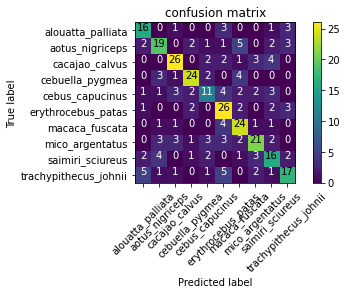

In [27]:
cm_plot_labels = ["alouatta_palliata",'aotus_nigriceps',"cacajao_calvus","cebuella_pygmea","cebus_capucinus","erythrocebus_patas","macaca_fuscata","mico_argentatus","saimiri_sciureus","trachypithecus_johnii"]
plot_confusion_matrix(con_mat, cm_plot_labels, title="confusion matrix")

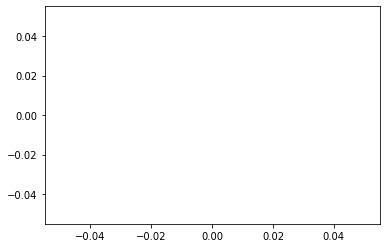